### Random Sample Imputation

Aim : Random sample imputation consists of taking random sample from the dataset and we use this observation to replace the 
nan values.

Where it should be used?
It assumes that data are missing at random(MCAR).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [35]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
random=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
median=df.Age.median()

median

28.0

In [37]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample_index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [38]:
impute_nan(df,"Age",median)

In [39]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


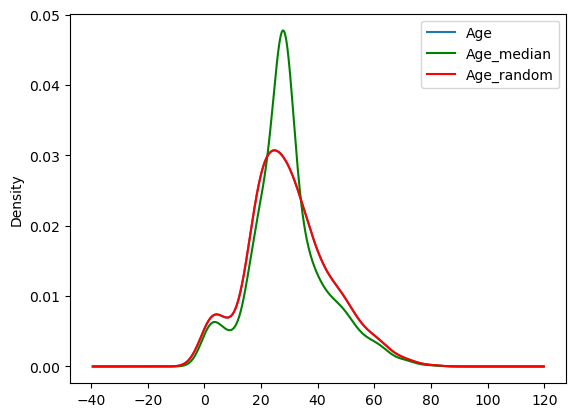

In [51]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='green')
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

In [49]:
std1=df['Age_random'].std()
std2=df['Age'].std()

In [50]:
std1,std2

(14.526497332334044, 14.526497332334044)

## Advantages
1. Easy to implement
2. There is less distortion in variance

## Disadvantages
1.Every situation randomness won't work

## Capturing nan values with a new features


It works well if the data are not missing completely at random

In [55]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [59]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [61]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [62]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages

1. Easy to implement
2. Captures the importance of missing values

### Disadvantages

1. Creating additional features( Curse of dimensionality)

### End  of distribution imputation

In [65]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

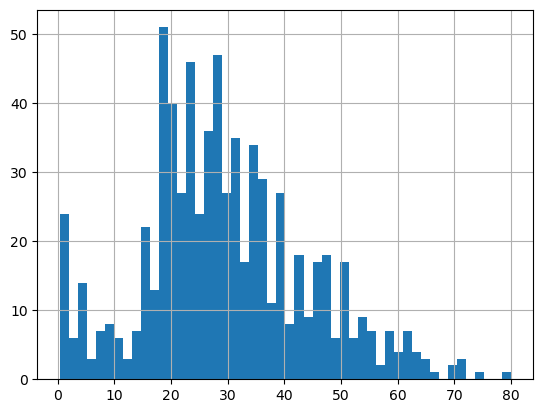

In [66]:
df.Age.hist(bins=50)

In [80]:
extreme=df.Age.mean()+3*df.Age.std()

In [81]:
import seaborn as sns

<Axes: xlabel='Age'>

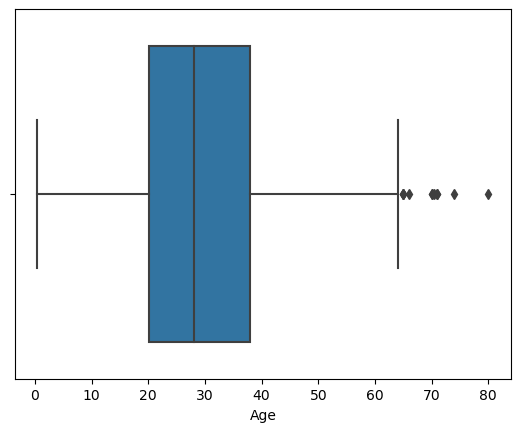

In [82]:
sns.boxplot(df,x='Age')

In [89]:
def impute_nan(df,vairable,median,extreme):
    df[vairable+"_end_Distribution"]=df['Age'].fillna(extreme)
    df[vairable].fillna(median,inplace=True)

In [91]:
impute_nan(df,'Age',median,extreme)

In [92]:
df.head()

,Survived,Age,Fare,Age_end_Distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [95]:
std1=df['Age'].std()
std2=df['Age_end_Distribution'].std()
std1,std2

(13.019696550973194, 21.719150677136366)

<Axes: >

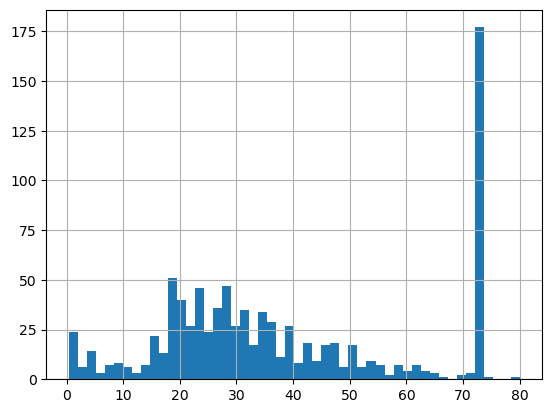

In [104]:
df['Age_end_Distribution'].hist(bins=50)

<Axes: xlabel='Age_end_Distribution'>

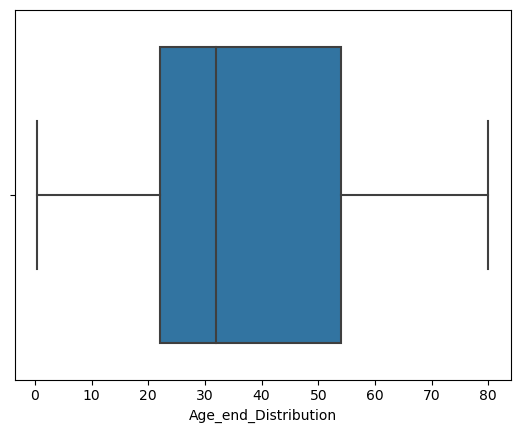

In [105]:
sns.boxplot(df,x='Age_end_Distribution')

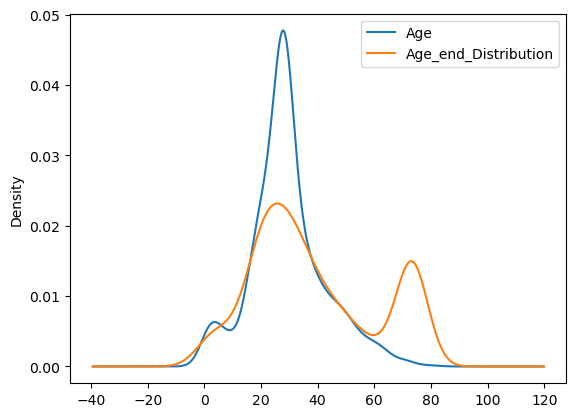

In [107]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_Distribution.plot(kind='kde',ax=ax)
lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')